Imports

In [2]:
from pathlib import Path
import importlib
import time

import numpy as np
import pandas as pd
import scipy
from scipy.stats import pearsonr

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import pyBigWig
import pysam

from Modules import utils, plot_utils

Global variables

In [3]:
importlib.reload(utils)
importlib.reload(plot_utils)
data_dir = '../shared_folder'
writing_dir = '../shared_folder'
# writing_dir='../'
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.rcParams.update({'axes.labelsize': 16})

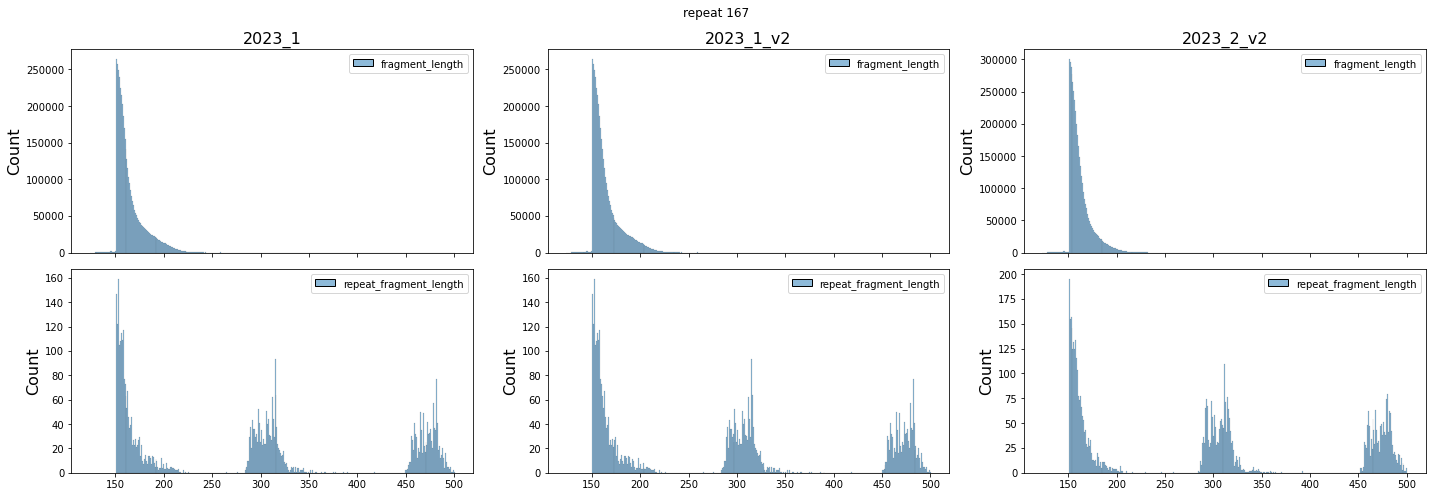

In [20]:
file_list = ['MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_paired',
            #  'MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_paired_101bp',
             'MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_101bp_max250',
             'MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_101bp_max250']
            #  'MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_paired',
            #  'MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_paired',
            #  'MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_paired',
            #  'MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_paired']
titles = ['2023_1', '2023_1_v2', '2023_2_v2']
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(20, 7), facecolor='w')
fig.suptitle('repeat 167')
for i, filename in enumerate(file_list):
    ix, iy = 0, i  # i // 2, i % 2
    fraglens = pd.read_csv(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{filename}.sorted.bam.insert_sizes.txt', header=None)
    repfraglens = pd.read_csv(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{filename}.sorted.bam.repeat_insert_sizes.txt', header=None)
    fraglens.columns = ['fragment_length']
    repfraglens.columns = ['repeat_fragment_length']
    sns.histplot(fraglens, discrete=True, ax=axes[0 + 2*ix, iy])
    sns.histplot(repfraglens, discrete=True, ax=axes[1 + 2*ix, iy])
    axes[0 + ix*2, iy].set_title(titles[i], fontsize=16)
fig.tight_layout()

In [4]:
mnase2020_167 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_paired.bw')
mnase2020_197a = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_paired.bw')
mnase2020_197b = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_paired.bw')
mnase2020_237_1 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_paired.bw')
mnase2020_237_2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_paired.bw')

mnase2022_237sansD_1 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_paired.bw')
mnase2022_237sansD_2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_paired.bw')
mnase2022_237D10_1 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_paired.bw')
mnase2022_237D10_2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_paired.bw')
mnase2022_237D50_1 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_paired.bw')
mnase2022_237D50_2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_paired.bw')

mnase2023_167_1 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_paired.bw')
mnase2023_167_2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_paired.bw')
mnase2023_197a_1 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_paired.bw')
mnase2023_197a_2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_paired.bw')
mnase2023_197b_1 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_paired.bw')
mnase2023_197b_2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_paired.bw')
mnase2023_237_1 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_paired.bw')
mnase2023_237_2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_paired.bw')

rna2022_167 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_paired.bw')
rna2022_197a = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_paired.bw')
rna2022_197b = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_paired.bw')
rna2022_237 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_237_lib556540_7886_1_paired.bw')
rna2022_237sansD = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237sansD_lib587179_8045_2_paired.bw')
rna2022_237D = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237D_lib587178_8045_2_paired.bw')

rna2023_167 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_167_4_lib717029_10297_1_paired.bw')
rna2023_197a = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_1_22_lib717030_10297_1_paired.bw')
rna2023_197b = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_paired.bw')
rna2023_237 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_237_44_lib717032_10297_1_paired.bw')


In [18]:
# mnase2020_167_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_paired_101bp_max250.bw')
# mnase2020_197a_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_paired_101bp_max250.bw')
# mnase2020_197b_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_paired_101bp_max250.bw')
# mnase2020_237_1_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_paired_101bp_max250.bw')
# mnase2020_237_2_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_paired_101bp_max250.bw')

# mnase2022_237sansD_1_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_paired_101bp_max250.bw')
# mnase2022_237sansD_2_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_paired_101bp_max250.bw')
# mnase2022_237D10_1_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_paired_101bp_max250.bw')
# mnase2022_237D10_2_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_paired_101bp_max250.bw')
# mnase2022_237D50_1_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_paired_101bp_max250.bw')
# mnase2022_237D50_2_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_paired_101bp_max250.bw')

mnase2023_167_1_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_paired_101bp_max250.bw')
# mnase2023_167_2_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_paired_101bp_max250.bw')
# mnase2023_197a_1_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_paired_101bp_max250.bw')
# mnase2023_197a_2_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_paired_101bp_max250.bw')
# mnase2023_197b_1_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_paired_101bp_max250.bw')
# mnase2023_197b_2_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_paired_101bp_max250.bw')
# mnase2023_237_1_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_paired_101bp_max250.bw')
# mnase2023_237_2_v2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_paired_101bp_max250.bw')

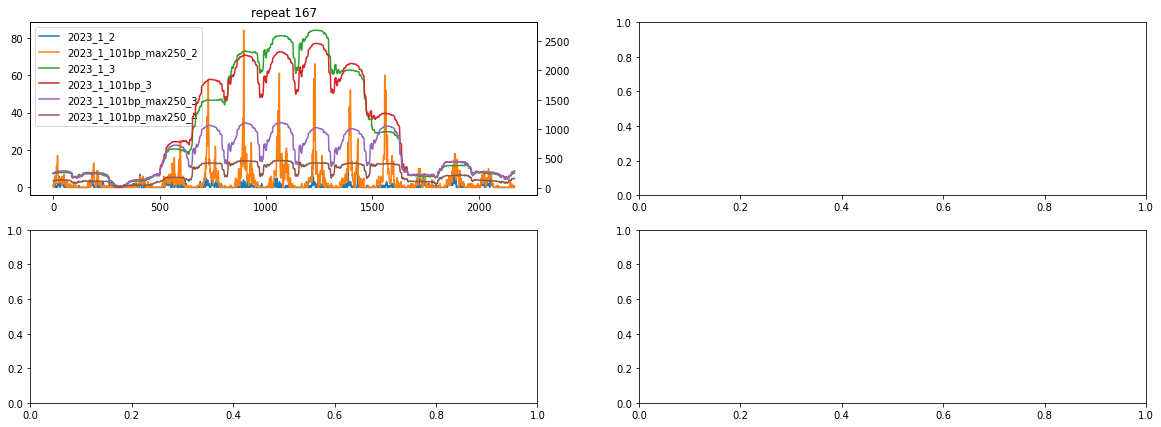

In [20]:
start = 3500
stop = -3500

fig, axes = plt.subplots(2, 2, figsize=(20, 7), facecolor='w')

axes[0, 0].set_title('repeat 167')
axes[0, 0].plot(mnase2023_167_1_2['167_7_4kbrf'][start:stop], label='2023_1_2')
axes[0, 0].plot(mnase2023_167_1_101bp_max250_2['167_7_4kbrf'][start:stop], label='2023_1_101bp_max250_2')
ax0 = axes[0, 0].twinx()
ax0.plot(mnase2023_167_1_3['167_7_4kbrf'][start:stop], label='2023_1_3', color=colors[2])
ax0.plot(mnase2023_167_1_101bp_3['167_7_4kbrf'][start:stop], label='2023_1_101bp_3', color=colors[3])
ax0.plot(mnase2023_167_1_101bp_max250_3['167_7_4kbrf'][start:stop], label='2023_1_101bp_max250_3', color=colors[4])
ax0.plot(mnase2023_167_1_101bp_max250_4['167_7_4kbrf'][start:stop], label='2023_1_101bp_max250_4', color=colors[5])
h, l = plot_utils.add_legend([axes[0, 0], ax0])
axes[0, 0].legend(h, l)

# axes[0, 1].set_title('repeat 237')
# axes[0, 1].plot(mnase2020_237_1['237_7_4kbrf'][start:stop], label='2020_1')
# axes[0, 1].plot(mnase2020_237_1['237_7_4kbrf'][start:stop], label='2020_2')
# axes[0, 1].plot(mnase2023_237_1['237_7_4kbrf'][start:stop], label='2023_1')
# axes[0, 1].plot(mnase2023_237_2['237_7_4kbrf'][start:stop], label='2023_2')
# axes[0, 1].legend()

# axes[1, 0].set_title('repeat 197a')
# axes[1, 0].plot(mnase2020_197a['197a_7_4kbrf'][start:stop], label='2020')
# axes[1, 0].plot(mnase2023_197a_1['197a_7_4kbrf'][start:stop], label='2023_1')
# axes[1, 0].plot(mnase2023_197a_2['197a_7_4kbrf'][start:stop], label='2023_2')
# axes[1, 0].legend()

# axes[1, 1].set_title('repeat 197b')
# axes[1, 1].plot(mnase2020_197b['197b_7_4kbrf'][start:stop], label='2020')
# axes[1, 1].plot(mnase2023_197b_1['197b_7_4kbrf'][start:stop], label='2023_1')
# axes[1, 1].plot(mnase2023_197b_2['197b_7_4kbrf'][start:stop], label='2023_2')
# axes[1, 1].legend()

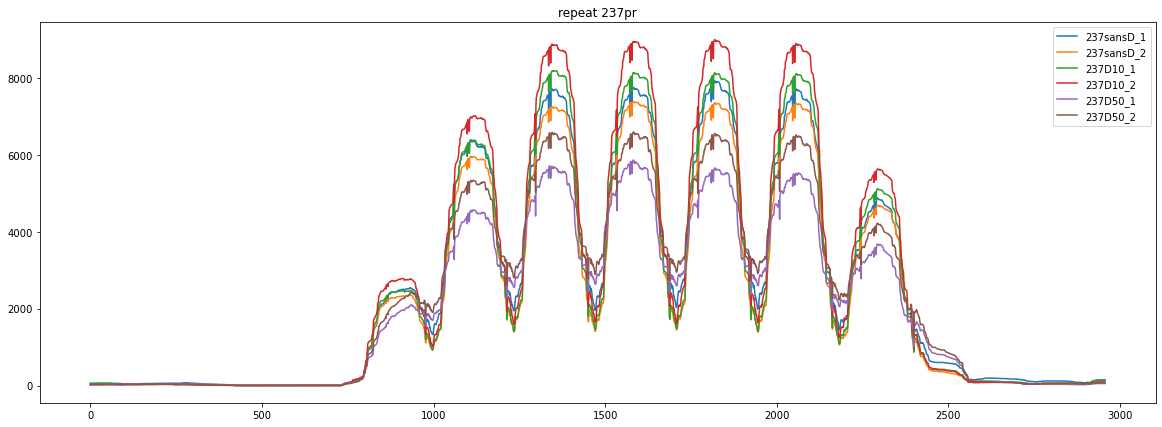

In [4]:
start = 3500
stop = -3500

fig, ax = plt.subplots(1, 1, figsize=(20, 7), facecolor='w')

ax.set_title('repeat 237pr')
ax.plot(mnase2022_237sansD_1['237pr_7_4kbrf'][start:stop], label='237sansD_1')
ax.plot(mnase2022_237sansD_2['237pr_7_4kbrf'][start:stop], label='237sansD_2')
ax.plot(mnase2022_237D10_1['237pr_7_4kbrf'][start:stop], label='237D10_1')
ax.plot(mnase2022_237D10_2['237pr_7_4kbrf'][start:stop], label='237D10_2')
ax.plot(mnase2022_237D50_1['237pr_7_4kbrf'][start:stop], label='237D50_1')
ax.plot(mnase2022_237D50_2['237pr_7_4kbrf'][start:stop], label='237D50_2')
ax.legend()